In [1]:
from simtk.openmm import app
import simtk.openmm as mm
from simtk import unit

In [2]:
pdb = app.PDBFile('ethane.pdb')
forcefield = app.ForceField('ethane.gaff2.xml')

/dartfs-hpc/rc/home/y/f0047qy/.conda/envs/labconda/lib/python3.7/site-packages/simtk/openmm/app/internal/pdbstructure.py:537: UserWarning: WARNING: duplicate atom (HETATM    2  C   LIG     1       2.559   0.089  -0.016  1.00  0.00           C  , HETATM    1  C   LIG     1       1.047   0.089  -0.016  1.00  0.00           C  )
  warnings.warn("WARNING: duplicate atom (%s, %s)" % (atom, old_atom._pdb_string(old_atom.serial_number, atom.alternate_location_indicator)))
/dartfs-hpc/rc/home/y/f0047qy/.conda/envs/labconda/lib/python3.7/site-packages/simtk/openmm/app/internal/pdbstructure.py:537: UserWarning: WARNING: duplicate atom (HETATM    4  H   LIG     1       0.662  -0.076   0.995  1.00  0.00           H  , HETATM    3  H   LIG     1       0.662   1.047  -0.378  1.00  0.00           H  )
  warnings.warn("WARNING: duplicate atom (%s, %s)" % (atom, old_atom._pdb_string(old_atom.serial_number, atom.alternate_location_indicator)))
/dartfs-hpc/rc/home/y/f0047qy/.conda/envs/labconda/lib/pytho

In [3]:
system = forcefield.createSystem(pdb.topology, nonbondedMethod=app.NoCutoff, constraints=app.HBonds)

integrator = mm.LangevinIntegrator(298.15*unit.kelvin, 5.0/unit.picoseconds, 2.0*unit.femtoseconds)
integrator.setConstraintTolerance(1e-5)

platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)

In [4]:
print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

Minimizing...
Potential energy before minimization is 11.124136261171031 kJ/mol
Potential energy after minimization is 4.389961756922238 kJ/mol


In [5]:
from sys import stdout

print('Equilibrating...')

simulation.reporters.append(app.StateDataReporter(stdout, 100, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*unit.kelvin)
simulation.step(2500)

Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
100,20.859344447035326,215.7817548226215
200,19.133397351405787,193.94382833774037
300,28.715703792642437,292.2514395090718
400,26.804975337985972,439.0040280079998
500,28.60282109764636,601.2322409611213
600,29.89161029513041,300.1238839240869
700,28.831434195938613,190.315901977638
800,19.717335288257793,409.67623115734636
900,53.782535397019416,316.15259468298154
1000,22.143720718554952,264.6742727620954
1100,34.55015347819803,377.5265422614519
1200,25.414847112761073,347.91378691037517
1300,15.457122743296626,283.45942829949934
1400,12.589440796042993,398.12320400665527
1500,15.124770644496913,318.48252321638097
1600,14.828641910964025,279.2165868944716
1700,31.835162814273463,233.95879930506453
1800,16.050219698572015,107.72037903635014
1900,15.97650333138599,284.90869708464015
2000,22.236499481705096,184.47919171588072
2100,25.462007650557574,207.10655143583705
2200,38.05133517393788,371.9530009181244
2300,10

In [6]:
import time as time

print('Running Production...')

# Begin timer
tinit=time.time()

# Clear simulation reporters
simulation.reporters.clear()

# Reinitialize simulation reporters. We do this because we want different information printed from the production run than the equilibration run.
# output basic simulation information below every 250000 steps - (which is equal to 2 fs(250,000) = 500,000 fs = 500 ps)
simulation.reporters.append(app.StateDataReporter(stdout, 250000, 
    step=True, time=True, potentialEnergy=True, temperature=True, 
    speed=True, separator=','))

# write out a trajectory (i.e., coordinates vs. time) to a DCD
# file every 100 steps - 0.2 ps
simulation.reporters.append(app.DCDReporter('ethane_sim.dcd', 100))

# run the simulation for 1.0x10^7 steps - 20 ns
simulation.step(10000000)

# End timer
tfinal=time.time()
print('Done!')
print('Time required for simulation:', tfinal-tinit, 'seconds')

Running Production...
#"Step","Time (ps)","Potential Energy (kJ/mole)","Temperature (K)","Speed (ns/day)"
250000,500.0000000016593,19.94189362580657,184.12309355203536,0
500000,999.9999999901769,23.24848119148946,135.2320974109206,2.09e+04
750000,1499.9999999783536,16.28567808610506,293.1139105850112,1.98e+04
1000000,1999.9999999665301,24.66073494306937,246.67788239611923,2.05e+04
1250000,2499.9999999547067,23.81247931176902,530.9266988301663,2.14e+04
1500000,2999.9999999428833,24.074601662783795,194.72878950335863,2.16e+04
1750000,3499.99999993106,30.647485719024978,176.62241915939057,2.17e+04
2000000,3999.9999999192364,13.360667961859049,298.5237266573914,2.19e+04
2250000,4499.9999999992715,16.52065900277948,487.5186116055057,2.21e+04
2500000,5000.000000101135,26.24017000715163,409.95757720734315,2.23e+04
2750000,5500.000000202998,20.550552390937536,134.91765529999577,2.26e+04
3000000,6000.000000304862,14.971989586925758,258.7065052128738,2.26e+04
3250000,6500.000000406725,33.8600448

In [18]:
import mdtraj as md

traj = md.load('ethane_sim.dcd', top='ethane.pdb')

In [19]:
import nglview as ngl

visualize = ngl.show_mdtraj(traj)
visualize

NGLWidget(max_frame=99999)

In [20]:
atoms, bonds = traj.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,LIG,0,
1,2,C2,C,1,LIG,0,
2,3,H11,H,1,LIG,0,
3,4,H12,H,1,LIG,0,
4,5,H13,H,1,LIG,0,
5,6,H21,H,1,LIG,0,
6,7,H22,H,1,LIG,0,
7,8,H23,H,1,LIG,0,


In [10]:
bond_indices = [0, 1] # atoms to define the bond length
bond_length = md.compute_distances(traj, [bond_indices])

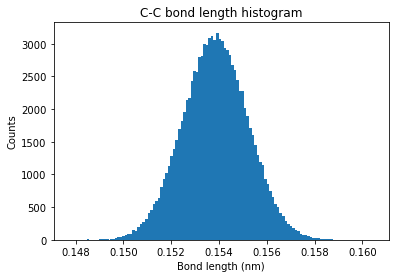

In [11]:
import matplotlib.pyplot as plt

bondcounts, binedges, otherstuff = plt.hist(bond_length, bins=120)
plt.title('C-C bond length histogram')
plt.xlabel('Bond length (nm)')
plt.ylabel('Counts')
plt.show()

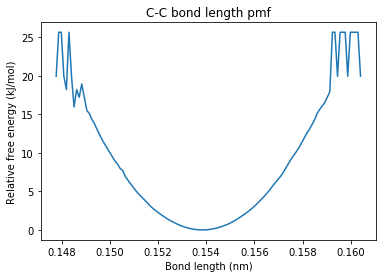

In [15]:
import numpy as np 
import statsmodels.api as sm

kB = 8.31446/1000 # Boltzmann constant in kJ/mol
Temp = 298.15 # simulation temperature

bondcounts[bondcounts==0] = 0.1
pmf = -kB*Temp*np.log(bondcounts)
pmf = pmf - np.min(pmf)

bincenters = (binedges[1:] + binedges[:-1])/2

pmf_smoothed = sm.nonparametric.lowess(pmf, bincenters, frac=0.05)
pmf_s = pmf_smoothed[:,1] - np.min(pmf_smoothed[:,1])

plt.plot(bincenters, pmf_s)
plt.xlabel('Bond length (nm)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.title('C-C bond length pmf')
plt.show()

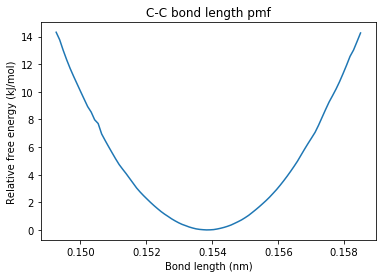

In [16]:
plt.plot(bincenters[pmf_s < 15], pmf_s[pmf_s < 15])
plt.xlabel('Bond length (nm)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.title('C-C bond length pmf')
plt.show()